<h1> Logistic Regression & SVM </h1>

<h3> KNN practice </h3>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the test features, print the results
pred = knn.predict(X_test)[0]
print("Prediction for test example 0:", pred)

<h3> LogitR & SVM (Linear) </h3>

<b> LogitR

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()

In [10]:
lr = LogisticRegression(solver = 'lbfgs', multi_class = 'ovr', max_iter = 1000)
lr.fit(wine.data, wine.target)
lr.score(wine.data, wine.target)

0.9831460674157303

In [16]:
lr.predict_proba(wine.data[:1])

array([[9.98414687e-01, 2.27623825e-04, 1.35768925e-03]])

<b> SVM

In [31]:
from sklearn.svm import LinearSVC
#does not converge even after 500000 iterations
svm = LinearSVC(max_iter = 1000)
svm.fit(wine.data, wine.target)
svm.score(wine.data, wine.target)
# multiple classes (more then 2) are handled automatically ...

C:\Users\varinsky\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9831460674157303

In [33]:
from sklearn.svm import SVC
# nonlinear classifier ...
svm = SVC(gamma = 'auto')
svm.fit(wine.data, wine.target)
svm.score(wine.data, wine.target)
# overfitted ???

1.0

<b> Hyperparameter finetuning </b> : overfitting (too complex, low test accuracy) / underfitting (too simple, low train accuracy)....

In [36]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression(solver = 'lbfgs', multi_class = 'ovr', max_iter = 1000)
lr.fit(Xtrain, ytrain)
print(lr.score(Xtrain, ytrain))
print(lr.score(Xtest, ytest))

# Apply SVM and print scores
svm = SVC(gamma = 'auto')
svm.fit(Xtrain, ytrain)
print(svm.score(Xtrain, ytrain))
print(svm.score(Xtest, ytest))

0.9992576095025983
0.9488888888888889
1.0
0.31555555555555553


In [ ]:
# Instantiate logistic regression and train
lr = LogisticRegression()
lr.fit(X, y)

# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])

# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])

In [46]:
# see below
lr.coef_ @ Xtrain[10] + lr.intercept_

array([-21.22947051, -20.76969914, -31.64842146, -12.93360467,
       -18.46024009, -18.63160269, -19.60667281, -32.70676513,
        10.00242137, -11.92737943])

<h3> Linear Classifiers </h3>

* that is a linear decision boundary

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Define the classifiers
classifiers = [LogisticRegression(solver = 'lbfgs', multi_class = 'ovr', max_iter = 1000), LinearSVC(), SVC(gamma = 'auto'), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(wine.data, wine.target)

#for c in classifiers:
#    print(c.score(wine.data, wine.target))
   
#Plot the classifiers - for plot_4_classifiers see: https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
plot_4_classifiers(X, y, classifiers)
plt.show()
# SVM, KNN are not linear, Logistic & LinearSVM are linear

0.9831460674157303
0.9325842696629213
1.0
0.7865168539325843


C:\Users\varinsky\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<h3> Linear classifiers: prediction equations </h3>

* conceptual / mathematic chapter
* <b> np.dot(x, y) <=> x @ y <=> np.sum(x * y) </b>
* raw model output = coefficients @ features + intercept
* if positive, predict one class, if negative, then predict the other class (that is check the sign) 
* negative value class is called 0, positive is called 1
    

LogitR and SVM have similar predict() function, but different fit() due to different loss function ...

In [49]:
# raw model output
print(Xtrain[10])
print(lr.coef_ @ Xtrain[10] + lr.intercept_)

[ 0.  0.  3. 10. 12. 12.  2.  0.  0.  1. 13. 12.  6. 13.  8.  0.  0.  8.
 16.  8.  8. 14.  1.  0.  0.  5. 14. 16. 16.  3.  0.  0.  0.  0. 12. 16.
 15.  2.  0.  0.  0.  3. 16.  2. 15. 10.  0.  0.  0.  4. 16.  8. 12. 12.
  0.  0.  0.  0.  9. 16. 15.  3.  0.  0.]
[-21.22947051 -20.76969914 -31.64842146 -12.93360467 -18.46024009
 -18.63160269 -19.60667281 -32.70676513  10.00242137 -11.92737943]


<p><p> <b> !!! check for XGBoost: </b> <p> https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py

In [ ]:
# Set the coefficients
model.coef_ = np.array([[-0.5,0.5]])
model.intercept_ = np.array([-1.5])

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

<h3> Loss Function & Diagrams</h3>

* eg. LinearRegressiom, the squared loss/error
* penalty score
* fit() minimizes the loss()
* in scikit, the score() is not the loss()

* classification error / accuracy
* "0-1 loss" - hard to minimize ...

In [54]:
from scipy.optimize import minimize

In [57]:
minimize(fun = np.square, x0 = 2).x

array([-1.88846401e-08])

In [60]:
# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_pred - y_i_true)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

IndexError: index 450 is out of bounds for axis 0 with size 450

<p><p> <b> Loss Function Diagrams </b>
    
* we cannot use the squared error loss from linear regression - problem on the right side of classification, we have error due to difference in prediction, but we still predict a 1 

In [67]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

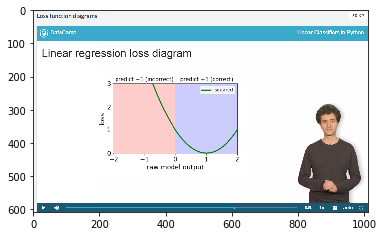

In [69]:
#plt.figure()
img = mpimg.imread("MLT in PY - LossF.png")
plt.imshow(img) 
#plt.show()  # display it

thus we have a logistic loss function & a Hinge Loss diagram (used in SVMs)

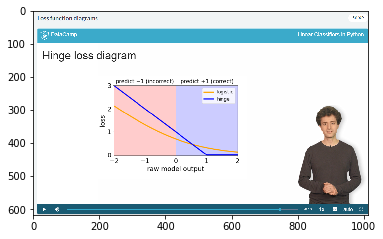

In [70]:
img = mpimg.imread("MLT in PY - LossF2.png")
plt.imshow(img) 

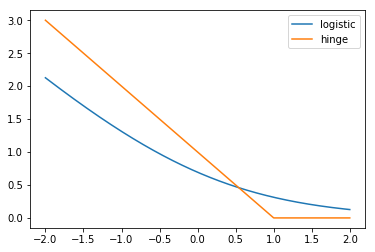

In [72]:
# Mathematical functions for logistic and hinge losses
# Feel free to ignore if you're not interested
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

In [73]:
# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        raw_model_output = w@X[i]
        #preco *y[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

NameError: name 'X' is not defined

<h3> Logistic Regression and regularization</h3>

* regularization prevents overfitting by making coefficients smaller
* scikit learn has hyperparameter C, the inverse of regularization strength, thus
* high values of C, provide low regularization, complex models, lower values of C, give high regularization, simpler models / smaller coefficients ...
* regularised loss = original loss + large coefficient penalty

 * L1 = lasso regularization (sets to zero, feature reduction)
 * L2 = ridge regularization (just sets small, to be "scaled")
 * do not forget scaling, before regularization attempts ...

In [ ]:
# Loop over values of C
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C = C_value)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

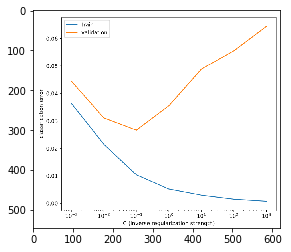

In [77]:
img = mpimg.imread("MLT in PY - C.png")
plt.imshow(img) 

In [79]:
from sklearn.model_selection import GridSearchCV

In [87]:
# Specify L1 regularization
#L1 penalty only with liblinear solver
lr = LogisticRegression(solver = 'liblinear', multi_class = 'ovr', penalty = 'l1')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]}, cv = 5, iid = True)
searcher.fit(Xtrain, ytrain)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 1}
Total number of features: 640
Number of selected features: 344


In [ ]:
# Get the indices of the sorted cofficients
inds_ascending = np.argsort(lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

<h3> Logistic Regression and probabilities </h3>

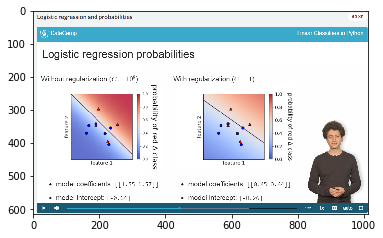

In [89]:
img = mpimg.imread("MLT in PY - Regular.png")
plt.imshow(img) 

* large C, no regularization, high values of proba
* small C, high regularization, smaller values of proba, smaller coefficients
* there is a connection between overfitting & overconfidence

* a sigmoid function changes raw model output to probas

In [ ]:
# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

In [ ]:
lr = LogisticRegression()
lr.fit(Xtrain,ytrain)

# Get predicted probabilities
proba = lr.predict_proba(Xtrain)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

<h3> Multiclass classification </h3>

* approach of combining different binary classifiers with one-vs-rest, multi_class = 'ovr'
* scikit-learn does this automatically ...

In [94]:
#raw model output !!!
lr.decision_function(Xtrain)[0] 

array([-24.4505069 , -22.26856754, -15.27352927,  16.01046601,
       -44.89627086, -12.39190713, -26.7481608 , -19.63090868,
       -13.75675814, -11.79143299])

* approach to edit the loss function directly
* multinomial or softmax

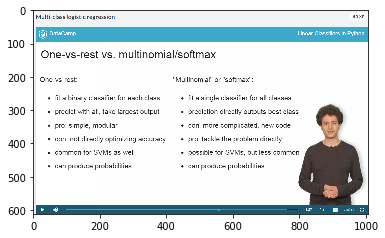

In [96]:
img = mpimg.imread("MLT in PY - Multiclass.png")
plt.imshow(img) 

* how do the coefficients look for multiclass classification?
* we end up with seperate model for each category ...
* multi_class = 'multinomial'

In [98]:
lr_mn = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr_mn.fit(Xtrain, ytrain)
print(lr_mn.score(Xtest, ytest))
print(lr_mn.intercept_.shape)

0.9533333333333334
(10,)


C:\Users\varinsky\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


<p><p> <b> this could be used for plotting decision boundaries : </b>

http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

In [ ]:
# We'll use SVC instead of LinearSVC from now on
from sklearn.svm import SVC

# Create/plot the binary classifier (class 1 vs. rest)
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train == 1)
plot_classifier(X_test, y_test == 1, svm_class_1)

<h3> Support Vectors </h3>

* SVM = hidge loss & L2 regularization
* support vector = a training example <b> NOT </b> into the flat part of the hinge loss diagram
* support vector = example that is incorrectly classified or close to the boundary, where "close" is controlled by regularization strength
* examples that matter for the fit it has loss = 0)
* but the non-support vectors are <b> "remarkable" </b>...
* having a small number of support vectors makes kernal SVMs really fast (not effected by training size)

<h3> Max-margin viewpoint</h3>

* margin = distance from boundary to the closest points
* SVM maximizes the "margin" for linearly separable datasets

In [100]:
#indeces of support vectors...
svm.support_

array([   6,   14,   46, ..., 1320, 1326, 1342])

In [ ]:
# Train a linear SVM
svm = SVC(kernel="linear")
svm.fit(X, y)
plot_classifier(X, y, svm, lims=(11,15,0,6))

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))

<h3> Kernel SVMs </h3>

* find transformation to transform features/data where they are linearly separable ...

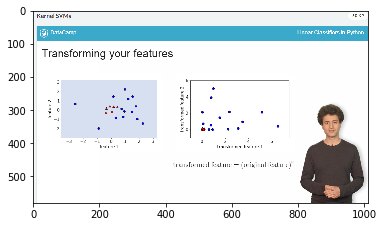

In [101]:
img = mpimg.imread("MLT in PY - Kernel.png")
plt.imshow(img) 

* <b>kernels</b>: radial-basis function kernel, default value 
* <b>hyperparameters</b>: C, gamma = smoothnes, the lower, the smoother ..., from zero to infinity ...
<p>
svm = SVC(gamma = 1)

In [107]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters, cv = 5, iid = True)
searcher.fit(Xtrain, ytrain)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(Xtest, ytest))

Best CV params {'gamma': 0.001}
Best CV accuracy 0.9866369710467706
Test accuracy of best grid search hypers: 0.9933333333333333


In [ ]:
svm.

<h3> Compare Logistic Regression and SVM </h3>

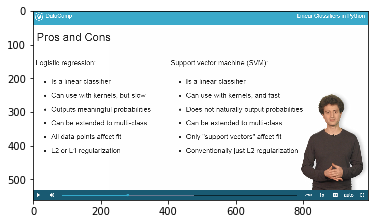

In [110]:
img = mpimg.imread("MLT in PY - Compare.png")
plt.imshow(img) 

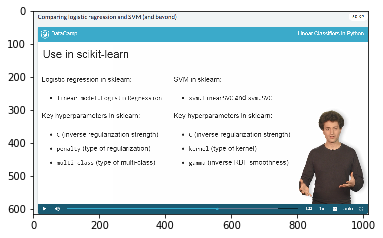

In [112]:
img = mpimg.imread("MLT in PY - Compare 2.png")
plt.imshow(img) 

<h3> SGDClassifier </h3>

* SGD = stochastic gradient descent
* for large datasets
* <br>
    logreg = SGDClassifier(loss = 'log') <br>
    linsvm = SGDClassifier(loss = 'hidge')
* hyperparameter: alpha = 1/C

In [ ]:
from sklearn.linear_model import SGDClassifier
# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['log','hinge'], 'penalty':['l1','l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(Xtrain, ytrain)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(Xtest, ytest))